In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [4]:
dataset = pd.read_csv("HR_comma_sep.csv")
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
dataset.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
dataset.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [11]:
dataset.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [18]:
dataset.groupby("Work_accident").sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years
Work_accident,,,,,,,
0,7785.67,9194.00,48824,2582148,44866,3402,243
1,1406.22,1546.81,8218,433406,7604,169,76


<AxesSubplot:xlabel='salary'>

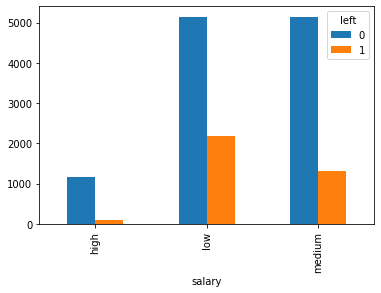

In [13]:
pd.crosstab(dataset.salary , dataset.left).plot(kind ='bar')

In [22]:
subdf = dataset[['satisfaction_level', 'average_montly_hours' , 'promotion_last_5years' ]]

In [26]:
dummies = pd.get_dummies(dataset.salary , prefix = 'salary')
training_and_testing_data = pd.concat([subdf , dummies] ,axis = 1)

x = training_and_testing_data
y = dataset['left']

In [30]:
xtrain , xtest , ytrain ,ytest = train_test_split(x,y)
print(f"train set shape : {xtrain.shape} , test set shape : {xtest.shape}")

train set shape : (11249, 6) , test set shape : (3750, 6)


In [33]:
model = LogisticRegression()
model

LogisticRegression()

In [34]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
model.score(xtest , ytest)

0.7701333333333333

In [40]:
model.predict_proba(xtest) s

array([[0.72625181, 0.27374819],
       [0.47455366, 0.52544634],
       [0.36512198, 0.63487802],
       ...,
       [0.94556332, 0.05443668],
       [0.81162745, 0.18837255],
       [0.90617938, 0.09382062]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest , model.predict(xtest))

0.7701333333333333

In [45]:
echo "# HR-comma" >> README.md

SyntaxError: invalid syntax (3214067988.py, line 1)